In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [6]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [8]:
sns.set_style("whitegrid")

/Users/lality/anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


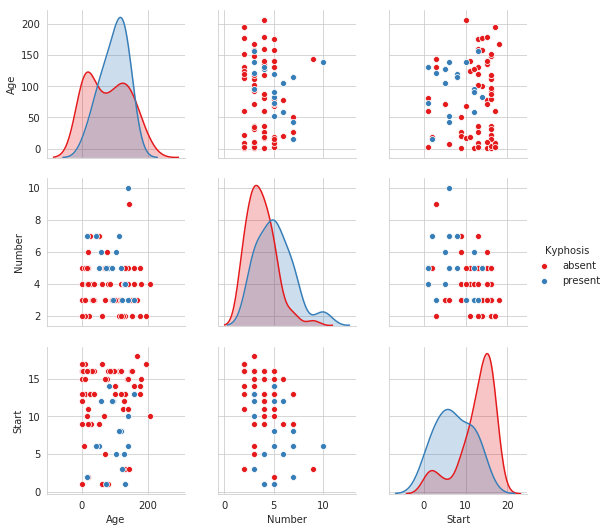

In [9]:
sns.pairplot(df, hue='Kyphosis', palette='Set1')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop('Kyphosis', axis = 1)
y = df['Kyphosis']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtree = DecisionTreeClassifier()

In [15]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
predicted = dtree.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test, predicted))
print('\n')
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

      absent       0.81      0.81      0.81        21
     present       0.33      0.33      0.33         6

   micro avg       0.70      0.70      0.70        27
   macro avg       0.57      0.57      0.57        27
weighted avg       0.70      0.70      0.70        27



[[17  4]
 [ 4  2]]


In [19]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
f_predicted = forest.predict(X_test)

In [21]:
print(classification_report(y_test, predicted))
print('\n')
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

      absent       0.81      0.81      0.81        21
     present       0.33      0.33      0.33         6

   micro avg       0.70      0.70      0.70        27
   macro avg       0.57      0.57      0.57        27
weighted avg       0.70      0.70      0.70        27



[[17  4]
 [ 4  2]]
